In this notebook we give an example of a sample of dark photons generated in the physical domain (z, kT) at a given mass M.

In [2]:
from dpp import setup as SETUP
from dpp import pdf as PDF
from dpp import collider, darkphoton

import random
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'monospace'

In [2]:
setup = SETUP.Setup(400, 3)

Generation of the sample

In [3]:
M = 2.5
sample_size = 1E4
fz0 = collider.get_fz0()
z0 = fz0(M)
dps = collider.generate_random_sample(setup, M, sample_size, z0)
z_scatter = [dp.z for dp in dps]
kT_scatter = [dp.kT for dp in dps]

Computation of the physical domain boundary

In [4]:
dp = darkphoton.DarkPhoton(setup, M)
zmin, zmax = dp.get_longitudinal_fraction_limit()

n = 1000
ztab = np.linspace(zmin, zmax, n)
kTtab = list()
for i, z in enumerate(ztab):
    dp = darkphoton.DarkPhoton(setup, M, z, 0)
    kTtab.append(dp.get_kTmax())

/home/jonas/Documents/DarkPhotonProduction/darkphoton/darkphoton.py:65: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kTmax)


Scatter plot of the sample within the physical domain. To random distributions are used. First a uniform distribution to cover the whole domain and second a gaussian distribution centered on the maximal differential cross section $z=z_0$ with standard deviation $\sigma=z_0$. Points outside the domain are rejected.
It appears that the analytic function describing the boundary gives complex results close to the minimal longitudinal fraction $z_{min}$. This needs to be understood...

<IPython.core.display.Javascript object>


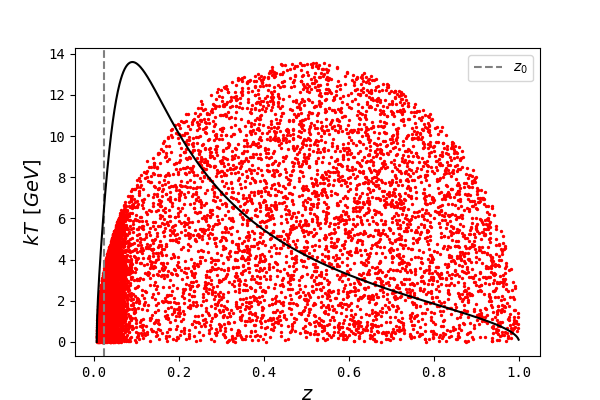

In [7]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(z_scatter, kT_scatter, color='r', s=2)
ax.axvline(x=z0, Linestyle='--', color='gray', label='$z_0$')
ax.plot(ztab, kTtab, color='k')

ax.set(xscale='linear', yscale='linear')
ax.set_xlabel('$z$', fontsize=14)
ax.set_ylabel('$kT\:\:[GeV]$', fontsize=14)

plt.legend(loc='best')
plt.show()

In [9]:
(setup.E_CM-setup.P_CM)/setup.m_proton

0.0342417637995292

In [11]:
import pandas as pd
pd.DataFrame(columns=['a','b'])

Empty DataFrame
Columns: [a, b]
Index: []

In [16]:
df1 = pd.DataFrame({'a':[1,2,4],'b':[1,5,6]})

In [17]:
df2 = pd.DataFrame({'a':[1,2,4],'b':[1,5,6]})

In [21]:
df1.append(df2)

a  b
0  1  1
1  2  5
2  4  6
0  1  1
1  2  5
2  4  6

In [19]:
df1

a  b
0  1  1
1  2  5
2  4  6